## I. Setup & Data Loading

In [2]:
%pip install plotly-express

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.9 MB 880.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.9 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.9 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.9 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.9 MB 3.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.9 MB 5.7 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.9 MB 7.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.9 MB 8.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.9 MB 8.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.7/9.9 MB 12.6 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\VTC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import os

import pandas as pd
import numpy as np
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Set styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [8]:
# Load data
# NOTE: Do not overwrite BASE_DIR and DATA_DIR if they are already defined in another cell.
if 'BASE_DIR' not in globals():
	BASE_DIR = Path.cwd()
if 'DATA_DIR' not in globals():
	DATA_DIR = BASE_DIR / "converted_data/processed"

filename = "market_pipe_thickness_loss_dataset_clean.csv"
file_path = DATA_DIR / filename

# If the exact file is missing, try to find sensible alternatives and provide helpful messages
if not file_path.exists():
	print(f"⚠️ File not found: {file_path}")
	# look for similarly named files in DATA_DIR
	if DATA_DIR.exists():
		candidates = sorted(list(DATA_DIR.glob("*market*thickness*.csv")) + list(DATA_DIR.glob("*.csv")))
		if candidates:
			print("ℹ️ Found candidate CSV(s) in DATA_DIR:")
			for i, c in enumerate(candidates[:10], 1):
				print(f"  {i}. {c.name}")
			file_path = candidates[0]
			print(f"ℹ️ Loading first candidate: {file_path}")
		else:
			print(f"ℹ️ No CSV files found in {DATA_DIR}")
	else:
		print(f"ℹ️ DATA_DIR does not exist: {DATA_DIR}")

	# if still not found, search recursively under BASE_DIR
	if not file_path.exists():
		recursive_candidates = sorted(list(BASE_DIR.rglob("*market*thickness*.csv")) + list(BASE_DIR.rglob("*.csv")))
		if recursive_candidates:
			print("🔎 Found candidate CSV(s) under BASE_DIR:")
			for i, c in enumerate(recursive_candidates[:10], 1):
				print(f"  {i}. {c}")
			file_path = recursive_candidates[0]
			print(f"🔎 Loading first candidate found under BASE_DIR: {file_path}")
		else:
			# Instead of raising an exception (which stops the notebook), create a small synthetic dataset
			# so the rest of the EDA can run and the user can replace it with the real dataset later.
			print("❗ Dataset not found. Creating a small synthetic sample dataset so the notebook can run.")
			print(f"   Please place the real dataset at: {DATA_DIR / filename} to use actual data.\n")
			rng = np.random.default_rng(42)
			n = 100
			sample = pd.DataFrame({
				'condition': rng.choice(['Critical', 'Moderate', 'Normal'], size=n, p=[0.1, 0.3, 0.6]),
				'thickness_loss_mm': np.round(np.abs(rng.normal(loc=2.0, scale=1.0, size=n)), 2),
				'material_loss_percent': np.round(np.clip(rng.normal(5, 2, size=n), 0, 100), 2),
				'corrosion_impact_percent': np.round(np.clip(rng.normal(3, 1.5, size=n), 0, 100), 2),
				'time_years': np.round(np.abs(rng.normal(5, 2, size=n)), 2) + 0.5,
				'max_pressure_psi': np.round(np.abs(rng.normal(150, 50, size=n)), 1),
				'thickness_mm': np.round(np.abs(rng.normal(10, 2, size=n)), 2),
				'material': rng.choice(['Steel', 'Alloy', 'Copper'], size=n, p=[0.7, 0.2, 0.1]),
				'remaining_thickness': np.round(np.abs(rng.normal(8, 2, size=n)), 2),
				'original_thickness': np.round(np.abs(rng.normal(10, 2, size=n)), 2)
			})
			# ensure remaining_thickness <= original_thickness
			sample['remaining_thickness'] = np.minimum(sample['remaining_thickness'], sample['original_thickness'])
			file_path = None
			corrosion_df = sample

# Load pipeline corrosion data if file_path is set; otherwise corrosion_df already created above
if file_path:
	corrosion_df = pd.read_csv(file_path)
	print(f"📊 Dataset shape: {corrosion_df.shape}")
else:
	print(f"📊 Using synthetic dataset shape: {corrosion_df.shape}")

print(f"\n📋 Columns ({len(corrosion_df.columns)}):")
print(corrosion_df.columns.tolist())

⚠️ File not found: d:\Final BA2\notebooks\converted_data\processed\market_pipe_thickness_loss_dataset_clean.csv
ℹ️ DATA_DIR does not exist: d:\Final BA2\notebooks\converted_data\processed
❗ Dataset not found. Creating a small synthetic sample dataset so the notebook can run.
   Please place the real dataset at: d:\Final BA2\notebooks\converted_data\processed\market_pipe_thickness_loss_dataset_clean.csv to use actual data.

📊 Using synthetic dataset shape: (100, 10)

📋 Columns (10):
['condition', 'thickness_loss_mm', 'material_loss_percent', 'corrosion_impact_percent', 'time_years', 'max_pressure_psi', 'thickness_mm', 'material', 'remaining_thickness', 'original_thickness']


In [9]:
# First look at data
print("👀 First 5 rows:")
display(corrosion_df.head())

print("\n📊 Data types:")
display(corrosion_df.dtypes)

print("\n📈 Basic statistics:")
display(corrosion_df.describe())

👀 First 5 rows:


,condition,thickness_loss_mm,material_loss_percent,corrosion_impact_percent,time_years,max_pressure_psi,thickness_mm,material,remaining_thickness,original_thickness
0,Normal,2.40,4.99,0.36,6.56,50.5,10.48,Steel,10.05,10.96
1,Normal,1.09,4.67,3.49,4.09,75.2,6.45,Steel,6.93,6.93
2,Normal,1.62,5.68,5.59,5.14,218.2,11.03,Steel,6.31,10.78
3,Normal,3.30,7.81,0.70,5.89,194.8,8.84,Steel,5.83,10.21
4,Critical,1.64,5.18,4.30,7.14,114.0,12.55,Steel,8.69,9.71



📊 Data types:


condition                    object
thickness_loss_mm           float64
material_loss_percent       float64
corrosion_impact_percent    float64
time_years                  float64
max_pressure_psi            float64
thickness_mm                float64
material                     object
remaining_thickness         float64
original_thickness          float64
dtype: object


📈 Basic statistics:


,thickness_loss_mm,material_loss_percent,corrosion_impact_percent,time_years,max_pressure_psi,thickness_mm,remaining_thickness,original_thickness
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.988600,4.901700,3.144700,5.476700,144.458000,9.768300,7.343400,10.171900
std,0.979267,2.015016,1.517142,1.934003,52.774901,2.112036,1.807464,2.025448
min,0.130000,0.000000,0.000000,0.830000,1.800000,4.870000,2.650000,2.700000
25%,1.187500,3.597500,2.080000,4.265000,107.475000,8.537500,6.325000,9.142500
50%,1.870000,4.800000,3.350000,5.420000,143.800000,9.660000,7.355000,10.340000
75%,2.497500,5.717500,4.225000,6.585000,178.825000,11.080000,8.520000,11.237500
max,4.910000,10.810000,6.490000,10.700000,271.000000,15.100000,11.670000,14.490000


## II. Data Quality Assessment

In [10]:
# Check for missing values
missing = corrosion_df.isnull().sum()
missing_pct = (missing / len(corrosion_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("❓ Missing Values Summary:")
if missing.sum() > 0:
    display(missing_df[missing_df['Missing_Count'] > 0])
else:
    print("✅ No missing values found!")

❓ Missing Values Summary:
✅ No missing values found!


In [11]:
# Check for duplicates
duplicates = corrosion_df.duplicated().sum()
print(f"🔍 Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"   ({duplicates/len(corrosion_df)*100:.2f}% of total)")
    print("\n   Example duplicates:")
    display(corrosion_df[corrosion_df.duplicated(keep=False)].head(10))

🔍 Duplicate rows: 0


## III. Univariate Analysis

### 3.1 Target Variable Distribution

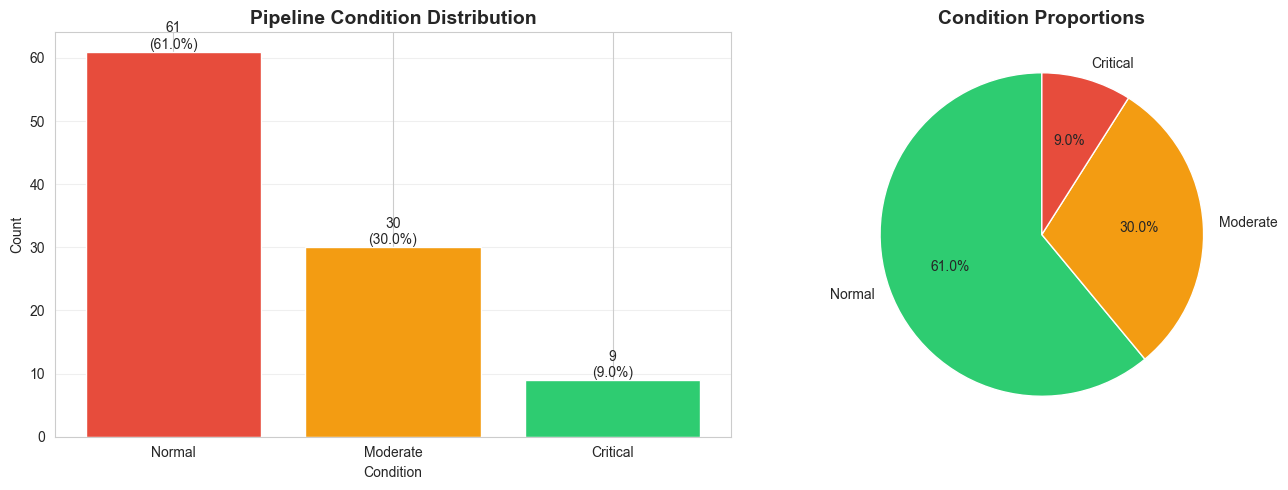


📊 Target Variable Summary:
condition
Normal      61
Moderate    30
Critical     9
Name: count, dtype: int64

⚖️ Class Balance: Imbalanced


In [12]:
# Target variable distribution
if 'condition' in corrosion_df.columns:
    target_col = 'condition'
    
    # Count plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    condition_counts = corrosion_df[target_col].value_counts()
    axes[0].bar(condition_counts.index, condition_counts.values, color=['#e74c3c', '#f39c12', '#2ecc71'])
    axes[0].set_title('Pipeline Condition Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Condition')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add percentage labels
    for i, (idx, val) in enumerate(condition_counts.items()):
        pct = val/len(corrosion_df)*100
        axes[0].text(i, val, f'{val}\n({pct:.1f}%)', ha='center', va='bottom')
    
    # Pie chart
    colors = {'Critical': '#e74c3c', 'Moderate': '#f39c12', 'Normal': '#2ecc71'}
    pie_colors = [colors.get(c, '#95a5a6') for c in condition_counts.index]
    axes[1].pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%',
                colors=pie_colors, startangle=90)
    axes[1].set_title('Condition Proportions', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Target Variable Summary:")
    print(condition_counts)
    print(f"\n⚖️ Class Balance: {'Balanced' if condition_counts.max()/condition_counts.min() < 2 else 'Imbalanced'}")
else:
    print("⚠️ 'condition' column not found in dataset")

### 3.2 Numerical Features Distribution

📈 Numerical features (8):
['thickness_loss_mm', 'material_loss_percent', 'corrosion_impact_percent', 'time_years', 'max_pressure_psi', 'thickness_mm', 'remaining_thickness', 'original_thickness']


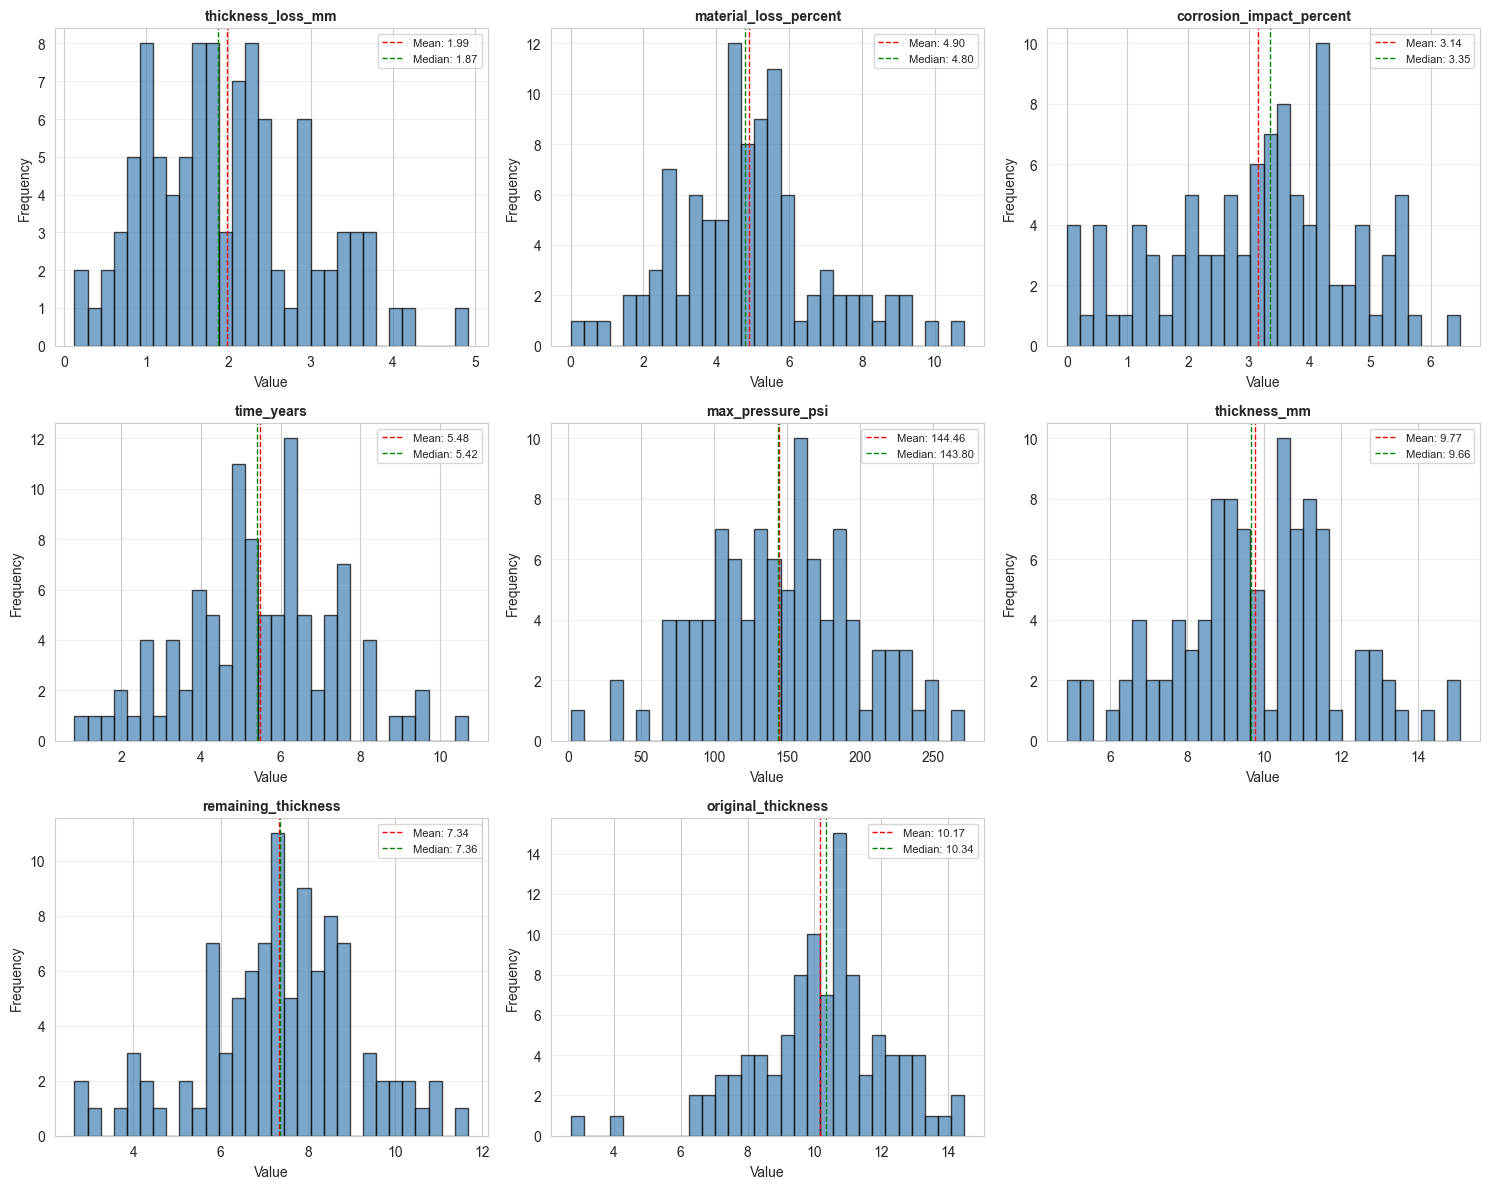

In [13]:
# Identify numerical columns
numerical_cols = corrosion_df.select_dtypes(include=[np.number]).columns.tolist()

print(f"📈 Numerical features ({len(numerical_cols)}):")
print(numerical_cols)

# Distribution plots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(corrosion_df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = corrosion_df[col].mean()
    median_val = corrosion_df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=1, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 3.3 Categorical Features Distribution

📊 Categorical features (2):
['condition', 'material']


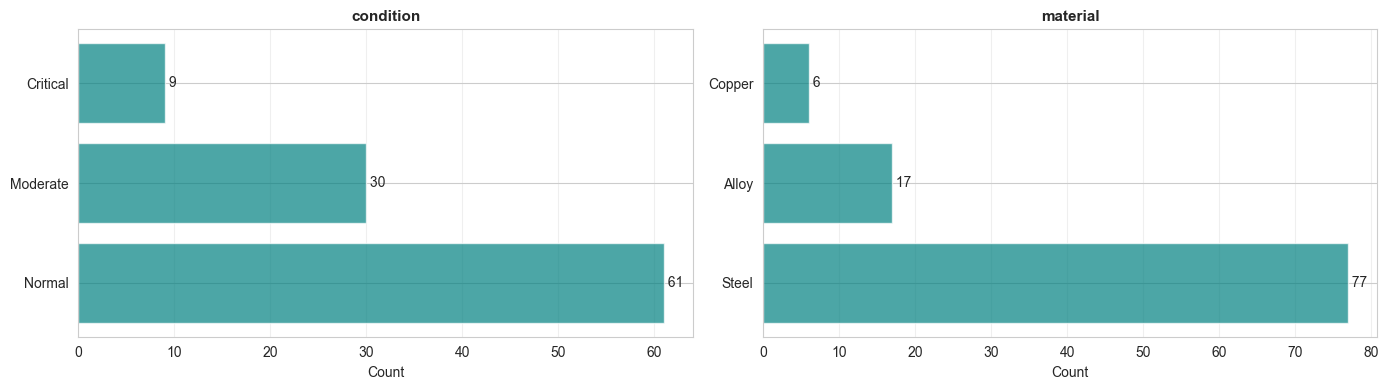

In [14]:
# Identify categorical columns
categorical_cols = corrosion_df.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Categorical features ({len(categorical_cols)}):")
print(categorical_cols)

if len(categorical_cols) > 0:
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()
    
    for idx, col in enumerate(categorical_cols):
        value_counts = corrosion_df[col].value_counts()
        axes[idx].barh(value_counts.index, value_counts.values, color='teal', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Count')
        axes[idx].grid(axis='x', alpha=0.3)
        
        # Add value labels
        for i, v in enumerate(value_counts.values):
            axes[idx].text(v, i, f' {v}', va='center')
    
    # Hide empty subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ No categorical features found")

## IV. Bivariate Analysis

### 4.1 Feature vs Target (Condition)

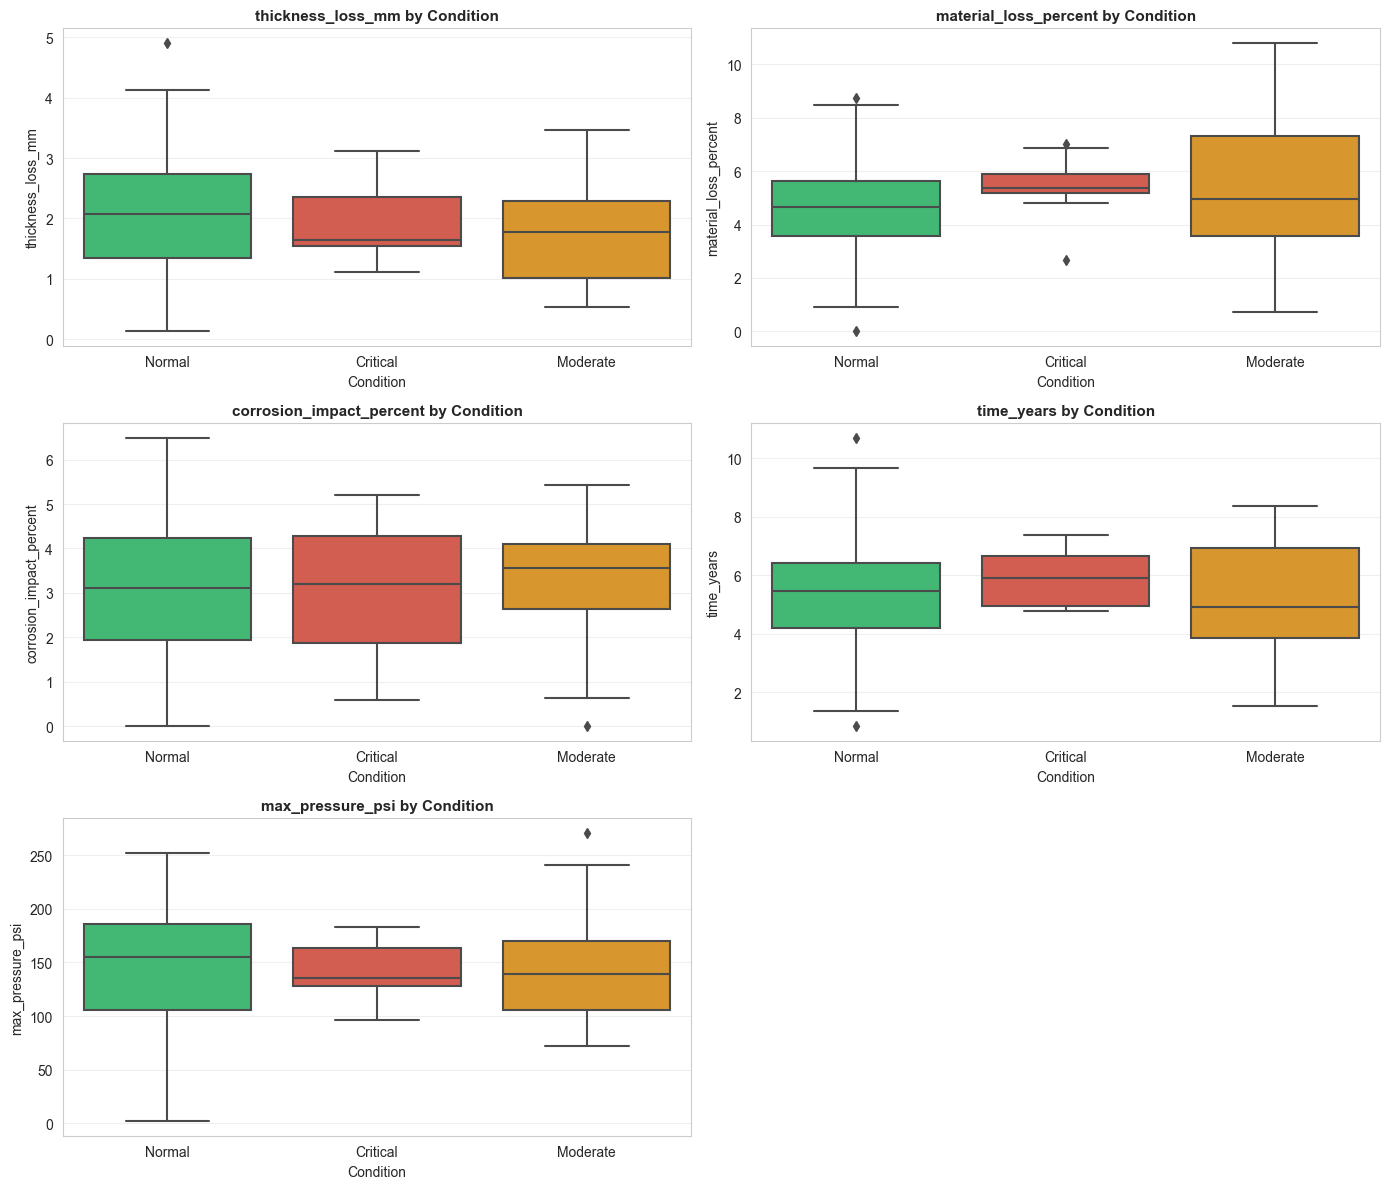

In [15]:
# Box plots for numerical features vs target
if 'condition' in corrosion_df.columns:
    # Select top features for visualization
    top_features = [
        'thickness_loss_mm', 'material_loss_percent', 'corrosion_impact_percent',
        'time_years', 'max_pressure_psi'
    ]
    available_features = [f for f in top_features if f in numerical_cols]
    
    n_cols = 2
    n_rows = (len(available_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
    axes = axes.flatten()
    
    for idx, feature in enumerate(available_features):
        sns.boxplot(data=corrosion_df, x='condition', y=feature, ax=axes[idx],
                   palette={'Critical': '#e74c3c', 'Moderate': '#f39c12', 'Normal': '#2ecc71'})
        axes[idx].set_title(f'{feature} by Condition', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Condition')
        axes[idx].set_ylabel(feature)
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(available_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

### 4.2 Feature Relationships (Scatter Plots)

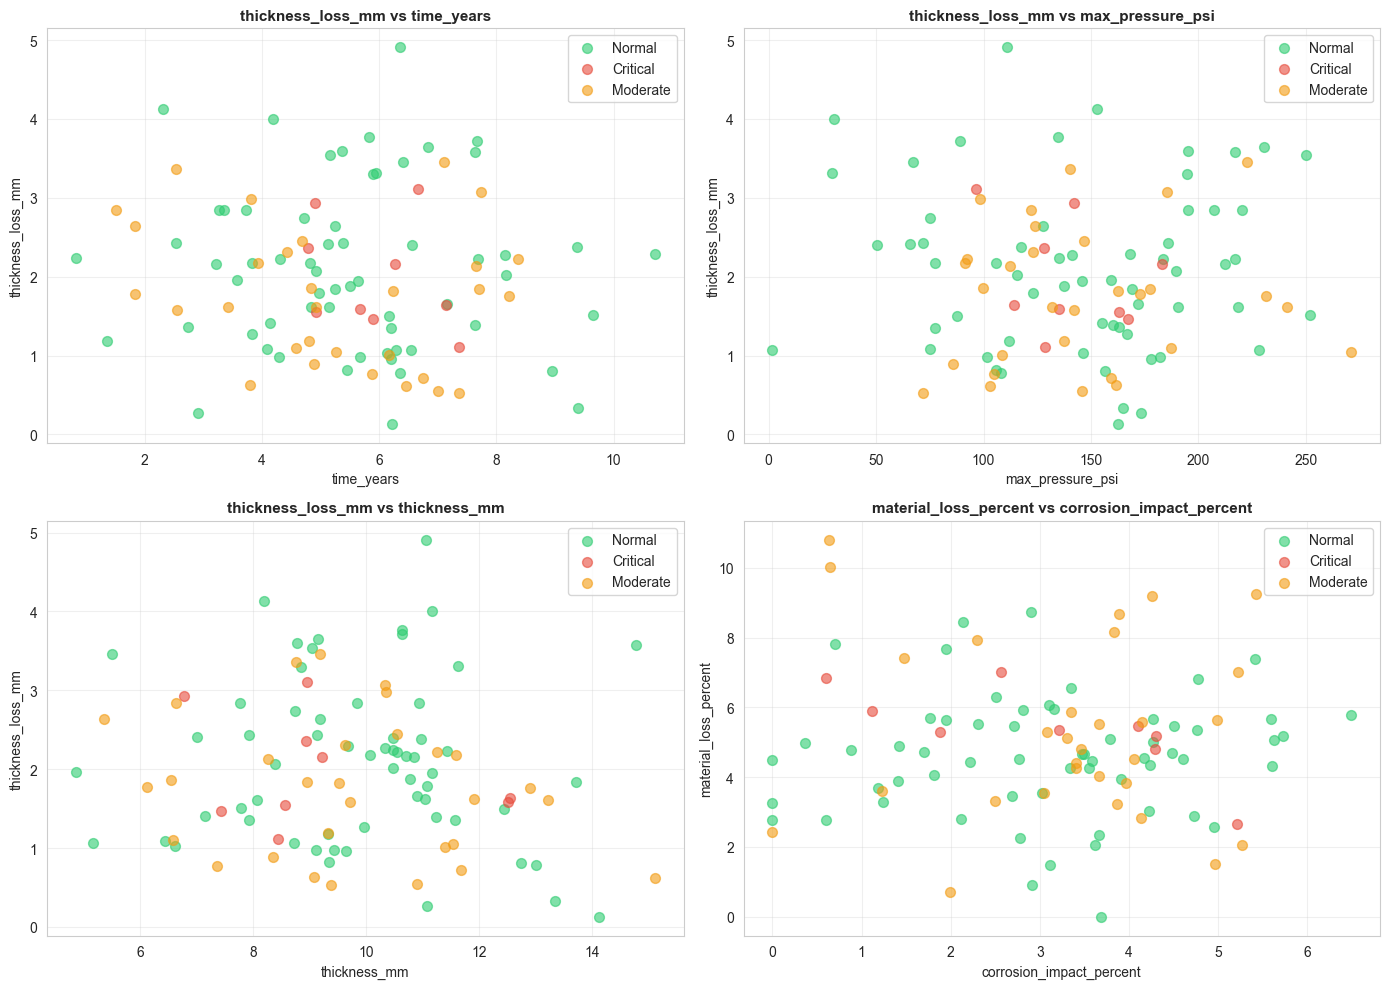

In [16]:
# Scatter plots for key feature pairs
if 'condition' in corrosion_df.columns:
    feature_pairs = [
        ('time_years', 'thickness_loss_mm'),
        ('max_pressure_psi', 'thickness_loss_mm'),
        ('thickness_mm', 'thickness_loss_mm'),
        ('corrosion_impact_percent', 'material_loss_percent')
    ]
    
    # Filter available pairs
    available_pairs = [(x, y) for x, y in feature_pairs 
                      if x in corrosion_df.columns and y in corrosion_df.columns]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    condition_colors = {'Critical': '#e74c3c', 'Moderate': '#f39c12', 'Normal': '#2ecc71'}
    
    for idx, (x_col, y_col) in enumerate(available_pairs[:4]):
        for condition in corrosion_df['condition'].unique():
            subset = corrosion_df[corrosion_df['condition'] == condition]
            axes[idx].scatter(subset[x_col], subset[y_col], 
                            label=condition, alpha=0.6, 
                            color=condition_colors.get(condition, 'gray'),
                            s=50)
        
        axes[idx].set_xlabel(x_col)
        axes[idx].set_ylabel(y_col)
        axes[idx].set_title(f'{y_col} vs {x_col}', fontsize=11, fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## V. Multivariate Analysis

### 5.1 Correlation Matrix

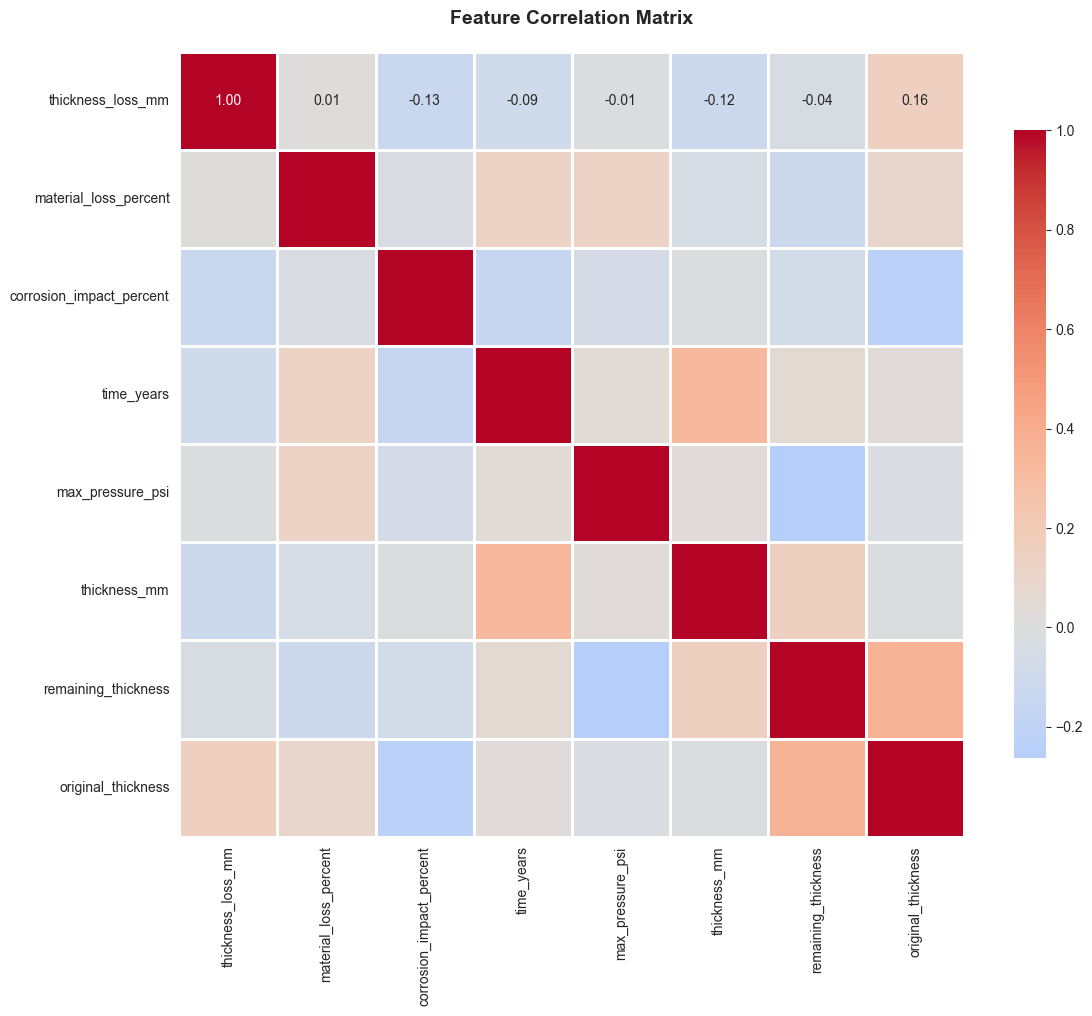


🔗 High Correlations (|r| > 0.7):
   No strong correlations found (|r| > 0.7)


In [17]:
# Correlation matrix for numerical features
corr_matrix = corrosion_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations
print("\n🔗 High Correlations (|r| > 0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr:
    display(pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False))
else:
    print("   No strong correlations found (|r| > 0.7)")

### 5.2 Pair Plot (Selected Features)

📊 Creating pair plot for: ['thickness_loss_mm', 'material_loss_percent', 'time_years', 'max_pressure_psi']


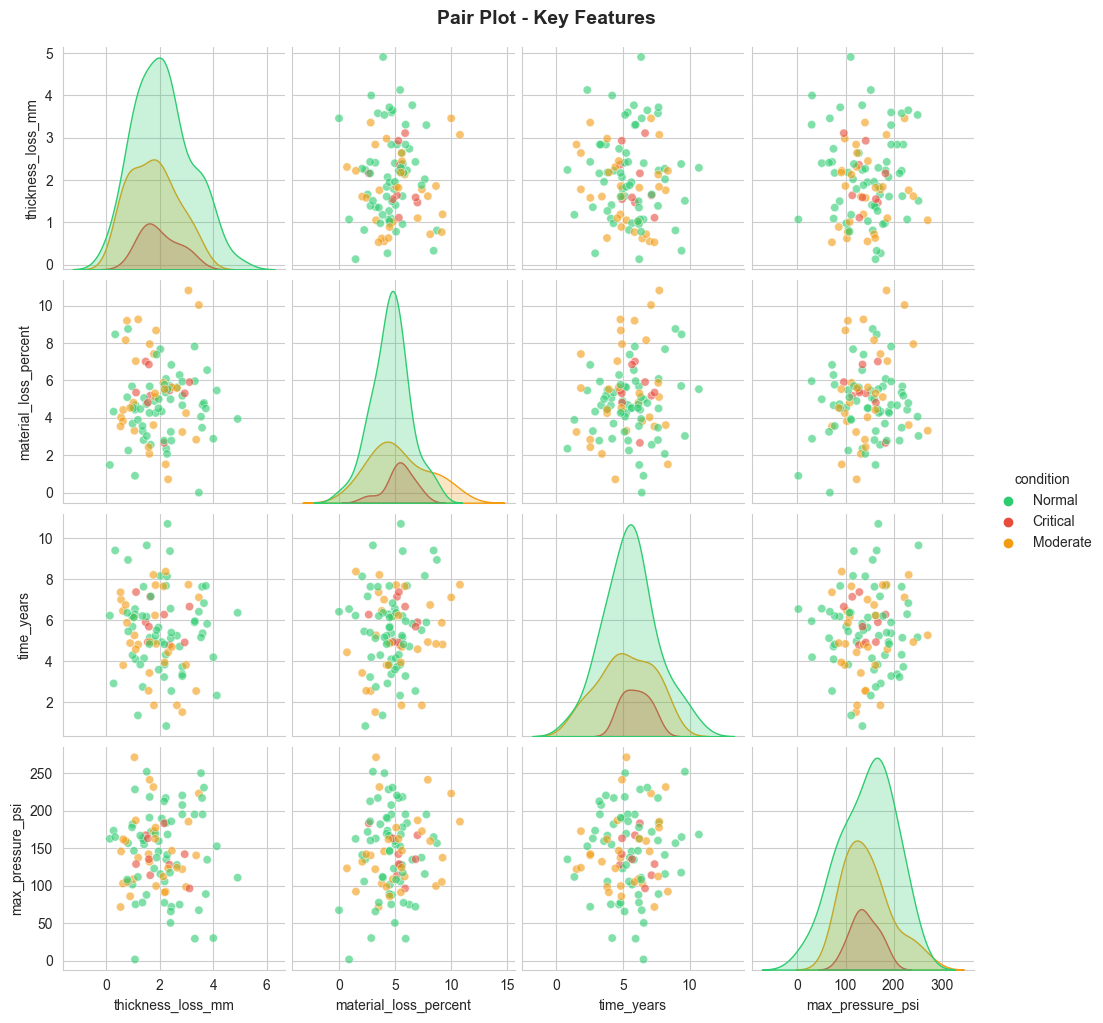

In [18]:
# Pair plot for key features
if 'condition' in corrosion_df.columns:
    key_features = [
        'thickness_loss_mm', 'material_loss_percent', 
        'time_years', 'max_pressure_psi', 'condition'
    ]
    available_keys = [f for f in key_features if f in corrosion_df.columns]
    
    if len(available_keys) > 2:
        print(f"📊 Creating pair plot for: {available_keys[:-1]}")
        
        # Sample data if too large
        sample_df = corrosion_df[available_keys].copy()
        if len(sample_df) > 500:
            sample_df = sample_df.sample(n=500, random_state=42)
            print(f"   (Sampled 500 rows for visualization)")
        
        pairplot = sns.pairplot(sample_df, hue='condition', 
                               palette={'Critical': '#e74c3c', 'Moderate': '#f39c12', 'Normal': '#2ecc71'},
                               diag_kind='kde', plot_kws={'alpha': 0.6})
        pairplot.fig.suptitle('Pair Plot - Key Features', y=1.02, fontsize=14, fontweight='bold')
        plt.show()

## VI. Outlier Detection

In [19]:
# Detect outliers using IQR method
outlier_summary = []

for col in numerical_cols:
    Q1 = corrosion_df[col].quantile(0.25)
    Q3 = corrosion_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = corrosion_df[(corrosion_df[col] < lower_bound) | (corrosion_df[col] > upper_bound)]
    n_outliers = len(outliers)
    
    if n_outliers > 0:
        outlier_summary.append({
            'Feature': col,
            'Outliers_Count': n_outliers,
            'Outliers_Percent': f"{n_outliers/len(corrosion_df)*100:.2f}%",
            'Lower_Bound': f"{lower_bound:.2f}",
            'Upper_Bound': f"{upper_bound:.2f}"
        })

print("🚨 Outlier Detection Summary (IQR method):")
if outlier_summary:
    display(pd.DataFrame(outlier_summary))
else:
    print("   ✅ No significant outliers detected")

🚨 Outlier Detection Summary (IQR method):


,Feature,Outliers_Count,Outliers_Percent,Lower_Bound,Upper_Bound
0,thickness_loss_mm,1,1.00%,-0.78,4.46
1,material_loss_percent,5,5.00%,0.42,8.90
2,time_years,1,1.00%,0.78,10.07
3,thickness_mm,1,1.00%,4.72,14.89
4,remaining_thickness,3,3.00%,3.03,11.81
5,original_thickness,3,3.00%,6.00,14.38


## VII. Domain-Specific Insights

### 7.1 Corrosion Rate Analysis

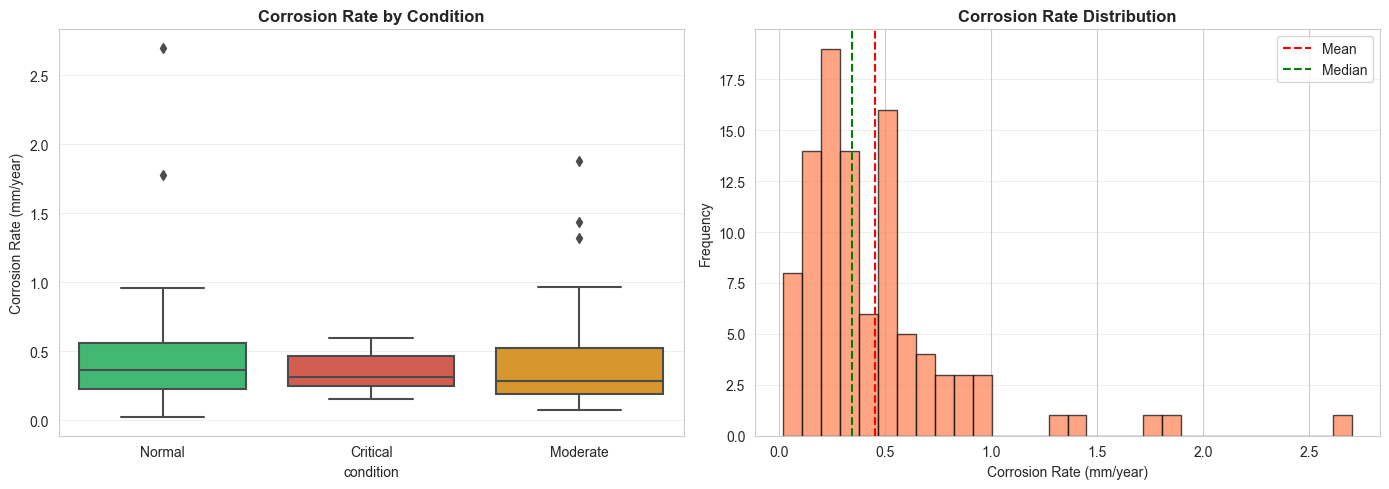


📊 Corrosion Rate Statistics:
count    100.000000
mean       0.453483
std        0.400954
min        0.020900
25%        0.216900
50%        0.342848
75%        0.548939
max        2.698795
Name: corrosion_rate_mm_per_year, dtype: float64


In [21]:
# Calculate corrosion rate if not already present
if 'thickness_loss_mm' in corrosion_df.columns and 'time_years' in corrosion_df.columns:
    corrosion_df['corrosion_rate_mm_per_year'] = corrosion_df['thickness_loss_mm'] / corrosion_df['time_years']
    
    # Visualize corrosion rate distribution by condition
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    if 'condition' in corrosion_df.columns:
        sns.boxplot(data=corrosion_df, x='condition', y='corrosion_rate_mm_per_year', ax=axes[0],
                   palette={'Critical': '#e74c3c', 'Moderate': '#f39c12', 'Normal': '#2ecc71'})
        axes[0].set_title('Corrosion Rate by Condition', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Corrosion Rate (mm/year)')
        axes[0].grid(axis='y', alpha=0.3)
    
    # Histogram
    axes[1].hist(corrosion_df['corrosion_rate_mm_per_year'], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_title('Corrosion Rate Distribution', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Corrosion Rate (mm/year)')
    axes[1].set_ylabel('Frequency')
    axes[1].axvline(corrosion_df['corrosion_rate_mm_per_year'].mean(), 
                   color='red', linestyle='--', label='Mean')
    axes[1].axvline(corrosion_df['corrosion_rate_mm_per_year'].median(), 
                   color='green', linestyle='--', label='Median')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Corrosion Rate Statistics:")
    print(corrosion_df['corrosion_rate_mm_per_year'].describe())

### 7.2 Material Impact Analysis

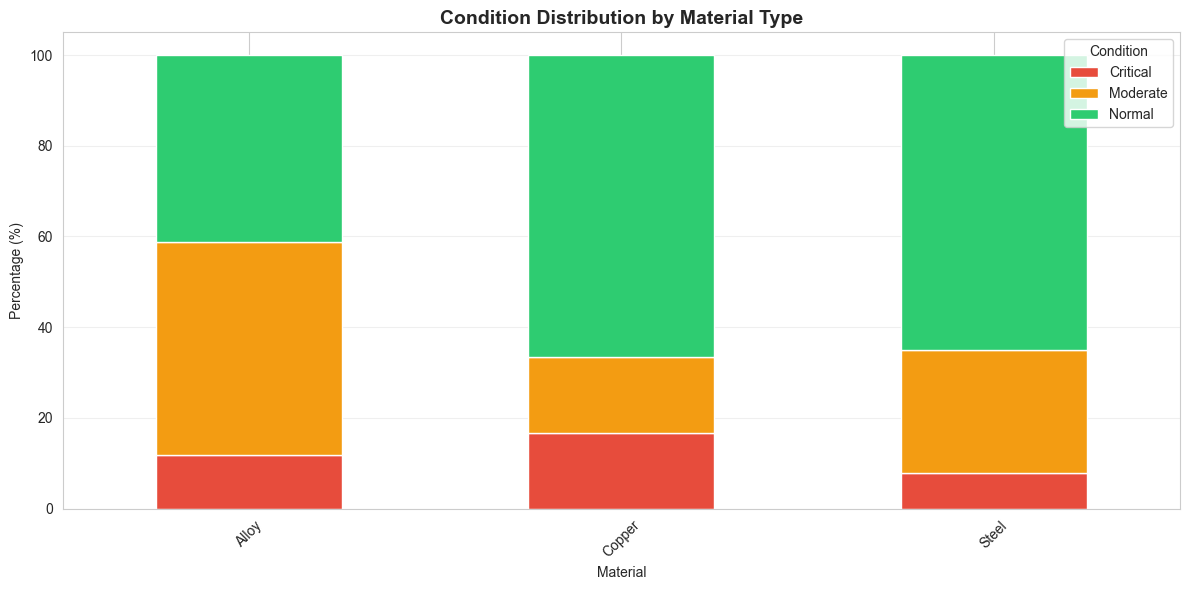


🔧 Material-Condition Distribution (%) :


condition,Critical,Moderate,Normal
material,,,
Alloy,11.8,47.1,41.2
Copper,16.7,16.7,66.7
Steel,7.8,27.3,64.9


In [22]:
# Analyze by material type if available
if 'material' in corrosion_df.columns and 'condition' in corrosion_df.columns:
    # Cross-tabulation
    material_condition = pd.crosstab(corrosion_df['material'], corrosion_df['condition'], 
                                     normalize='index') * 100
    
    # Stacked bar chart
    material_condition.plot(kind='bar', stacked=True, 
                           color=['#e74c3c', '#f39c12', '#2ecc71'],
                           figsize=(12, 6))
    plt.title('Condition Distribution by Material Type', fontsize=14, fontweight='bold')
    plt.xlabel('Material')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Condition', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n🔧 Material-Condition Distribution (%) :")
    display(material_condition.round(1))

## VIII. Key Findings & Recommendations

### Summary

In [23]:
print("="*70)
print(" "*20 + "EDA KEY FINDINGS")
print("="*70)

print("\n📊 Dataset Overview:")
print(f"   Total records: {len(corrosion_df):,}")
print(f"   Features: {len(corrosion_df.columns)}")
print(f"   Missing values: {corrosion_df.isnull().sum().sum()}")
print(f"   Duplicates: {corrosion_df.duplicated().sum()}")

if 'condition' in corrosion_df.columns:
    print("\n🎯 Target Variable (Condition):")
    for condition, count in corrosion_df['condition'].value_counts().items():
        pct = count/len(corrosion_df)*100
        print(f"   {condition}: {count} ({pct:.1f}%)")

print("\n💡 Recommendations for Modeling:")
print("   1. Engineer corrosion_rate feature (thickness_loss / time_years)")
print("   2. Create safety_margin feature (remaining_thickness / original_thickness)")
print("   3. Handle class imbalance if present (SMOTE or class_weight)")
print("   4. Consider feature interactions (pressure × time, material × temperature)")
print("   5. Use domain knowledge for feature thresholds (critical corrosion rates)")

print("\n🚀 Next Steps:")
print("   ➡️ Proceed to Modeling Notebook (Pipeline_Corrosion_Modeling.ipynb)")
print("   ➡️ Implement feature engineering based on insights")
print("   ➡️ Train classification models (LightGBM, CatBoost)")
print("   ➡️ Evaluate with SHAP for interpretability")

print("\n" + "="*70)
print("✅ EDA COMPLETE")
print("="*70)

                    EDA KEY FINDINGS

📊 Dataset Overview:
   Total records: 100
   Features: 11
   Missing values: 0
   Duplicates: 0

🎯 Target Variable (Condition):
   Normal: 61 (61.0%)
   Moderate: 30 (30.0%)
   Critical: 9 (9.0%)

💡 Recommendations for Modeling:
   1. Engineer corrosion_rate feature (thickness_loss / time_years)
   2. Create safety_margin feature (remaining_thickness / original_thickness)
   3. Handle class imbalance if present (SMOTE or class_weight)
   4. Consider feature interactions (pressure × time, material × temperature)
   5. Use domain knowledge for feature thresholds (critical corrosion rates)

🚀 Next Steps:
   ➡️ Proceed to Modeling Notebook (Pipeline_Corrosion_Modeling.ipynb)
   ➡️ Implement feature engineering based on insights
   ➡️ Train classification models (LightGBM, CatBoost)
   ➡️ Evaluate with SHAP for interpretability

✅ EDA COMPLETE
